In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import cv2

In [3]:
                            # list contatining  all images

#path=Path("C:/Users/Bhupesh/Desktop/bond/ST/CCMT/etc/sem4/Python/Machine learning/08-Linear-Regression-Models/JPGS")
#path=path.glob("*.jpg")
folder_dir = "C:/Users/Bhupesh/Desktop/bond/ST/CCMT/etc/sem4/Python/Machine learning/08-Linear-Regression-Models/JPGS/"

plt.rcParams['figure.figsize'] = [12,8]


In [5]:
images=[]

for filename in os.listdir(folder_dir):
    
    img = cv2.imread(folder_dir+filename , 0)
    #img=plt.imread(folder_dir+filename)  # reading image (Folder path and image name )
    #"/path/to/folder/*.jpg"

    img=np.array(img)#

    img = cv2.resize(img, (400,400))
    
    img=img.flatten()                # Flatten image 

    images.append(img)               # Appending all images in 'images' list 


In [6]:
images=np.array(images).T
images.shape

(160000, 167)

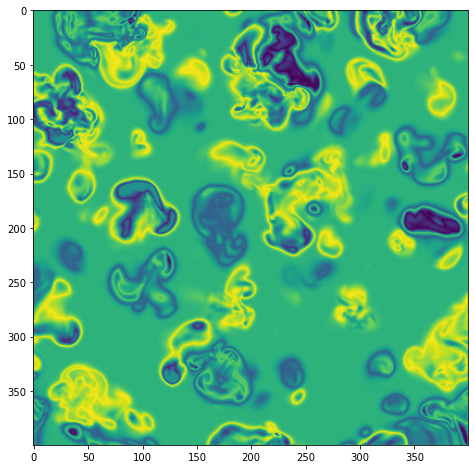

In [7]:
images_show = np.reshape(images[:,10], (400, 400))
plt.imshow(images_show)
plt.show()

In [8]:
U, S, VT = np.linalg.svd(images,full_matrices=False)

In [10]:
print(U)

[[-2.55974963e-03  1.24928707e-03 -3.00600689e-03 ... -9.69354543e-01
   9.56124857e-02 -6.81149574e-02]
 [-2.51900454e-03  1.52619971e-03 -3.25790356e-03 ...  1.24898247e-01
  -5.38475581e-01 -4.21848621e-02]
 [-2.45393236e-03  1.09997910e-03 -3.55314141e-03 ... -1.02367993e-01
  -2.71357588e-01  9.31093697e-01]
 ...
 [-2.44497793e-03  1.50872507e-03 -7.72079527e-04 ...  8.30853370e-05
  -4.10993316e-05 -1.96417725e-04]
 [-2.43506711e-03  1.54116540e-03 -8.52942937e-04 ...  4.82517492e-05
  -4.69182042e-05 -1.33174520e-04]
 [-2.45580710e-03  9.56829659e-04 -7.32301151e-04 ...  5.36402878e-05
  -2.06513873e-05 -9.38791616e-05]]


In [11]:
S = np.diag(S)
S.shape

(167, 167)

In [12]:
U.shape

(160000, 167)

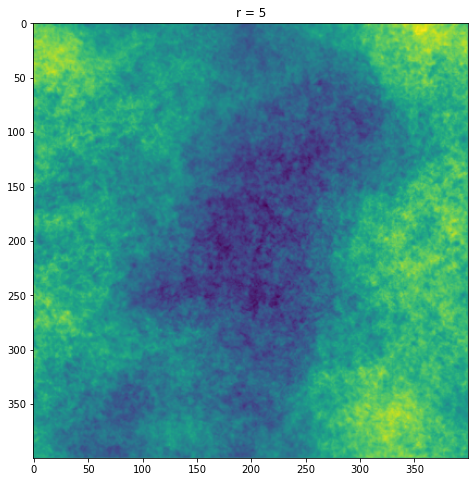

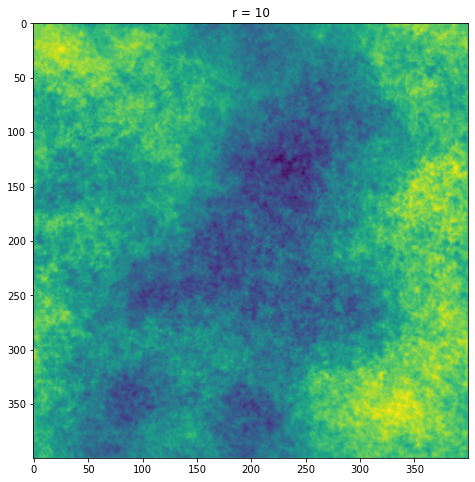

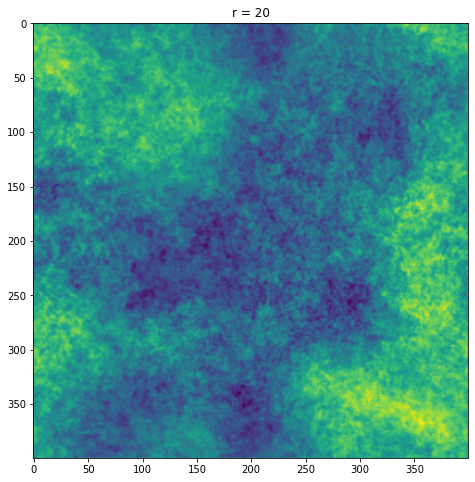

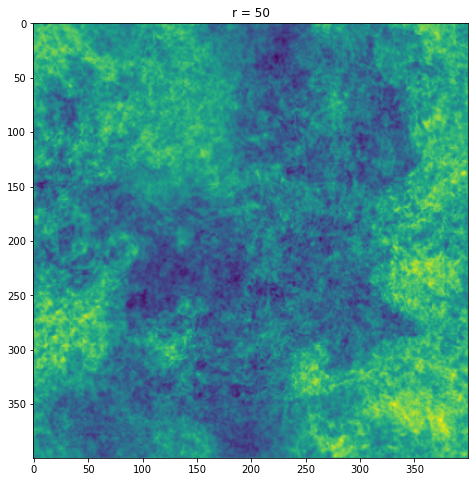

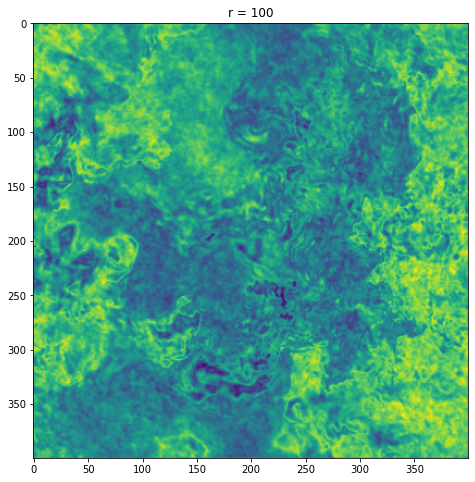

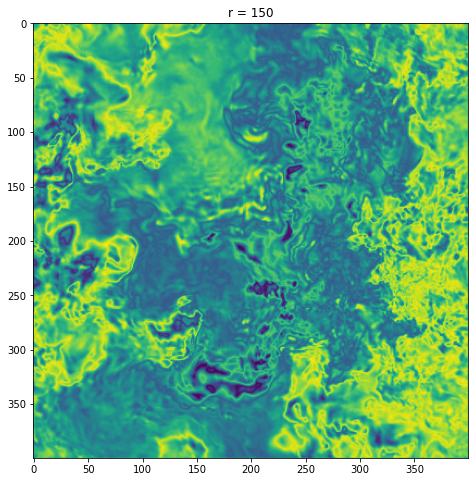

In [14]:
i=0
for r in (5, 10, 20, 50, 100, 150):
    img_approx = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(i+1)
    i+=1
    img = plt.imshow(np.reshape(img_approx[:,157], (400, 400)))
    plt.axis('on')
    plt.title('r = ' +str(r))
    plt.show()

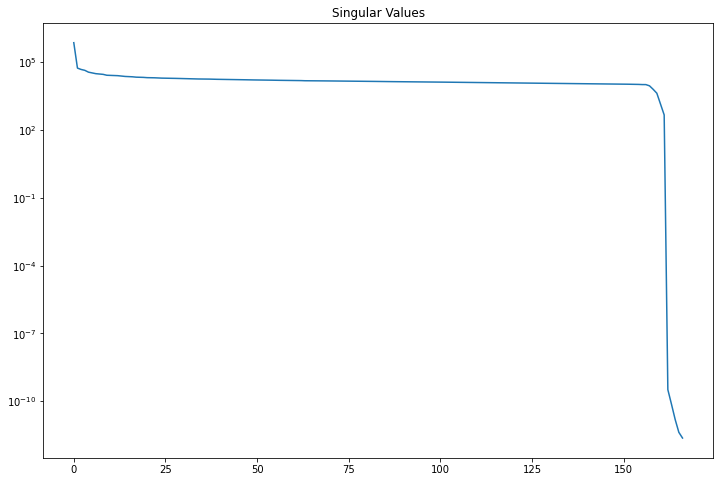

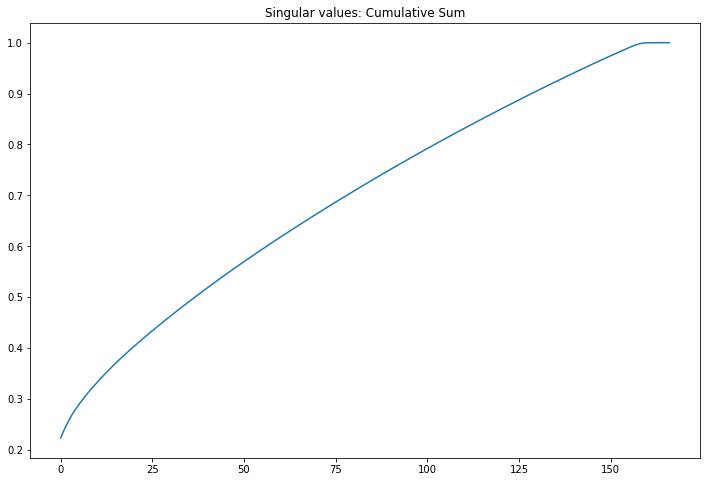

In [15]:
plt.figure(3)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(4)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular values: Cumulative Sum')
plt.show()

In [ ]:
#svm=SVC(max_iter=-1, kernel='linear', class_weight='balanced',gamma='scale')  # kernel linear is better Gausian kernel here
#model1.fit(train_img, train_label)
#acc1 = model1.score(test_img, test_label)
#print("SVM model accuracy: {:.2f}%".format(acc1 * 100))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_X,train_y.ravel())

In [ ]:
#Predict labels for the new data 
prediction2 = logreg.predict(testX)
#Measure Model Performance: accuracy score 
score = logreg.score(testX,testY)
print("Logistic Regression model accuracy: {:.2f}%".format(score * 100))

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

In [ ]:
#Confusion Matrix
cm = metrics.confusion_matrix(testY, prediction)
print(cm)

In [ ]:
#Seaborn Confusion Matrix 
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15)

In [ ]:
#Confusion Matrix
cm1 = metrics.confusion_matrix(testY, prediction1)
print(cm1)

In [ ]:
#Seaborn Confusion Matrix 
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(acc1)
plt.title(all_sample_title, size = 15)

In [ ]:
#Confusion Matrix
cm2 = metrics.confusion_matrix(testY, prediction2)
print(cm2)

In [ ]:
#Seaborn Confusion Matrix 
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap= 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)